In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
haberman_df = pd.read_csv('haberman.csv')
haberman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


since 'status' is the target variable having two class 1(survived) and 2(dead)

In [4]:
haberman_df.status.replace({1:'survived',2:'dead'}, inplace=True)
haberman_df.head()

,age,year,nodes,status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [5]:
haberman_df.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [6]:
haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


### Observation:
1 - Haberman's dataset is the data of patient who undergon breast cancer surgery and survived.<br>
2 - It has 3 features (age, year, nodes) and 1 binary class feature (status) and 306 instances/entries <br>
<ul type="a">
    <li> age - age of patient at the time of surgery (numerical)
    <li> year - patient year of operation (numerical)
    <li> nodes - number of positive auxilary nodes detected (numerical)
    <li> status - survived status (class attributes(1 or 2))<br>
        1 = the patient survived 5 years or longer<br>
        2 = the patient died within 5 year

In [7]:
haberman_df['status'].value_counts()

survived    225
dead         81
Name: status, dtype: int64

### Observation:
there are 306 patients, in which 225 patients survived and 81 patients died within 5 year of surgery, from this data we can say that 25% patients died and 75% patients survived, so this can also be considered as imbalanced dataset.

# Univariate analysis

C:\Users\Nehal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


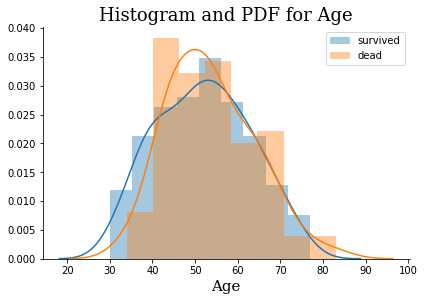

In [8]:
sns.FacetGrid(haberman_df, hue="status", height=4, aspect=1.5).map(sns.distplot, "age")

plt.title("Histogram and PDF for Age", fontsize=18, fontfamily= 'serif')
plt.xlabel('Age', fontsize=15, fontfamily= 'serif')
plt.legend();

### Observation:
patients less than 40 year survived more and patients greater than 76 year survived less.

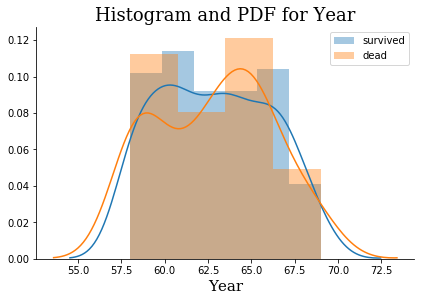

In [9]:
sns.FacetGrid(haberman_df, hue="status", height=4, aspect=1.5).map(sns.distplot, "year")

plt.title("Histogram and PDF for Year", fontsize=18, fontfamily= 'serif')
plt.xlabel('Year', fontsize=15, fontfamily= 'serif')
plt.legend();

### Observation
In the year 1965 to 1968, number of survived patiens is less as compared to dead patients.

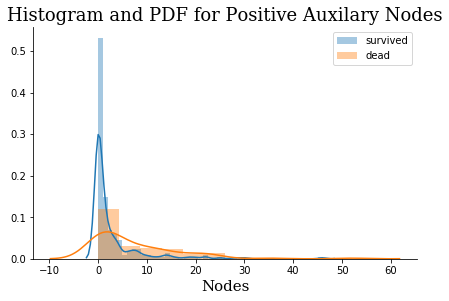

In [10]:
sns.FacetGrid(haberman_df, hue="status", height=4, aspect=1.5).map(sns.distplot, "nodes")

plt.title("Histogram and PDF for Positive Auxilary Nodes", fontsize=18, fontfamily= 'serif')
plt.xlabel('Nodes', fontsize=15, fontfamily= 'serif')
plt.legend();

### Observation
patients having less positive auxilary nodes having less mortality rete as compared to having more positive auxilary nodes.

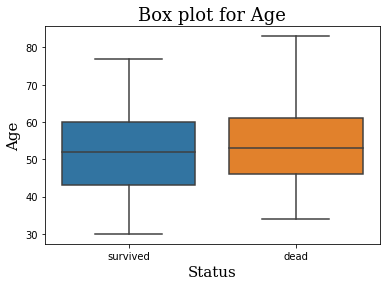

In [11]:
sns.boxplot(x='status', y='age', data=haberman_df)

plt.title("Box plot for Age", fontsize=18, fontfamily= 'serif')
plt.xlabel('Status', fontsize=15, fontfamily= 'serif')
plt.ylabel('Age', fontsize=15, fontfamily= 'serif');

### Observation
less age patients survived more

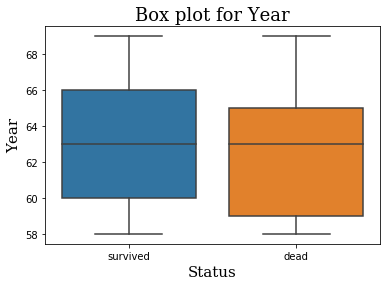

In [12]:
sns.boxplot(x='status', y='year', data=haberman_df)

plt.title("Box plot for Year", fontsize=18, fontfamily= 'serif')
plt.xlabel('Status', fontsize=15, fontfamily= 'serif')
plt.ylabel('Year', fontsize=15, fontfamily= 'serif');

### Observation
In the early years, patients survived less and in the later years, patients survival rete increased.

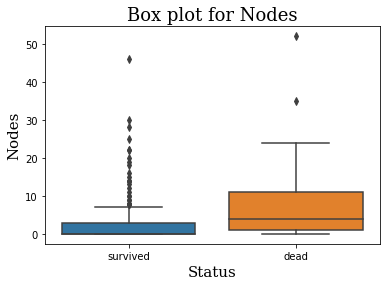

In [13]:
sns.boxplot(x='status', y='nodes', data=haberman_df)

plt.title("Box plot for Nodes", fontsize=18, fontfamily= 'serif')
plt.xlabel('Status', fontsize=15, fontfamily= 'serif')
plt.ylabel('Nodes', fontsize=15, fontfamily= 'serif');

### Ovservation
Patients having less positive auxilary nodes survived more.

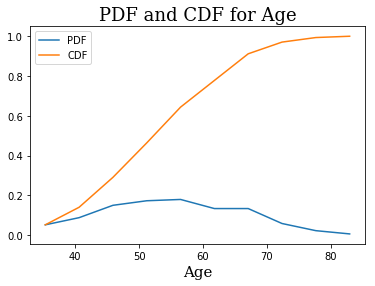

In [14]:
counts, bin_edges = np.histogram(haberman_df['age'], bins=10, density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')

plt.title("PDF and CDF for Age", fontsize=18, fontfamily= 'serif')
plt.xlabel('Age', fontsize=15, fontfamily= 'serif')
plt.legend();

### Observation
Less than 40 years of patients are almost 10%, as the age increases, number of patients increases. 

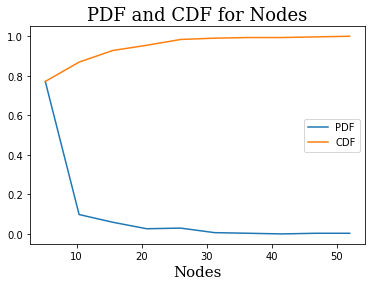

In [15]:
counts, bin_edges = np.histogram(haberman_df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')

plt.title("PDF and CDF for Nodes", fontsize=18, fontfamily= 'serif')
plt.xlabel('Nodes', fontsize=15, fontfamily= 'serif')
plt.legend();

### Observation
Almost 85% of patients have less than 10 positive auxilary nodes.

# Bivariate analysis

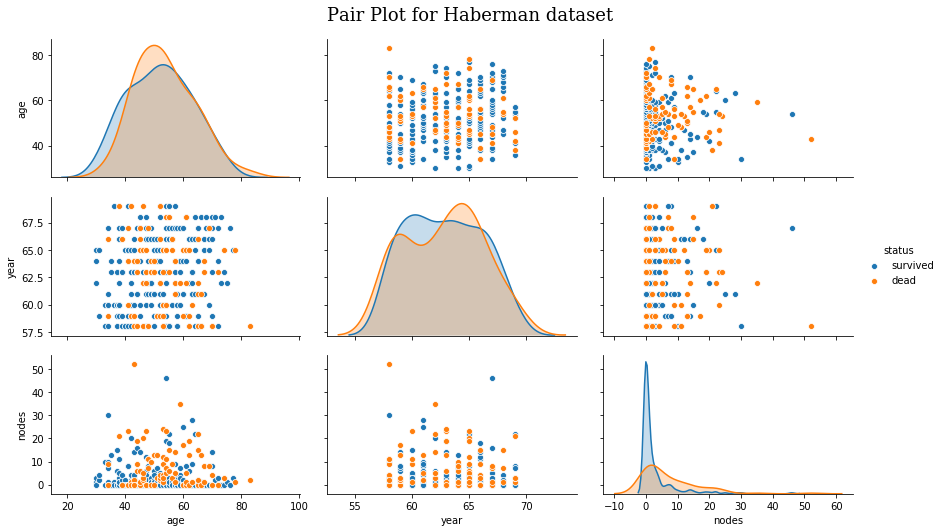

In [16]:
pp = sns.pairplot(haberman_df, hue='status', height=2.5, aspect=1.6)

pp.fig.suptitle("Pair Plot for Haberman dataset", fontsize=18, fontfamily= 'serif', );
pp.fig.subplots_adjust(top=0.92)

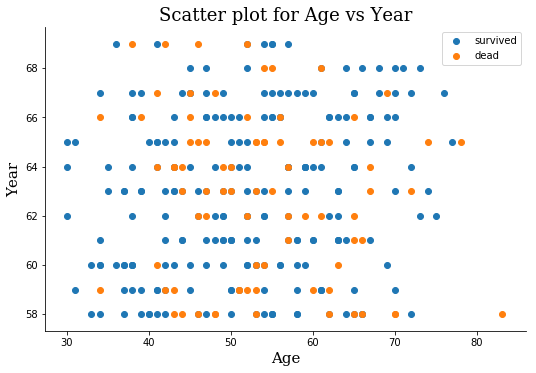

In [17]:
sns.FacetGrid(haberman_df, hue = 'status', height=5, aspect=1.5).map(plt.scatter, 'age', 'year')

plt.title("Scatter plot for Age vs Year", fontsize=18, fontfamily= 'serif')
plt.xlabel('Age', fontsize=15, fontfamily= 'serif')
plt.ylabel('Year', fontsize=15, fontfamily= 'serif')
plt.legend();

### Observation
in the year 1965, patients between the age of 52 to 62 mostly died.

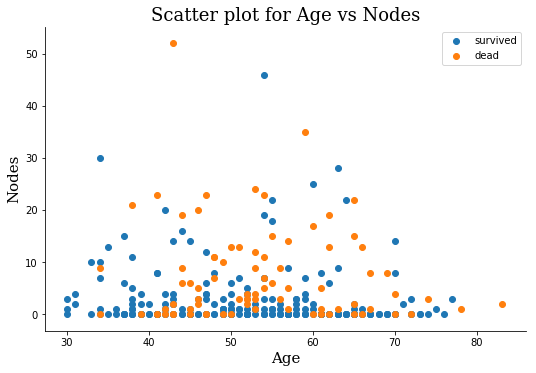

In [18]:
sns.FacetGrid(haberman_df, hue = 'status', height=5, aspect=1.5).map(plt.scatter, 'age', 'nodes')

plt.title("Scatter plot for Age vs Nodes", fontsize=18, fontfamily= 'serif')
plt.xlabel('Age', fontsize=15, fontfamily= 'serif')
plt.ylabel('Nodes', fontsize=15, fontfamily= 'serif')
plt.legend();

### Observation
very less patients have more than 25 positive auxilary ndes irrespective of their age.<br>
most of the patients died having positive auxilary nodes greater than 10 and age greater than 50.

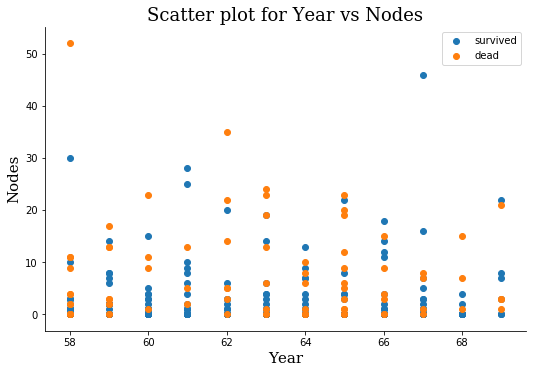

In [19]:
sns.FacetGrid(haberman_df, hue = 'status', height=5, aspect=1.5).map(plt.scatter, 'year', 'nodes')

plt.title("Scatter plot for Year vs Nodes", fontsize=18, fontfamily='serif')
plt.xlabel('Year', fontsize=15, fontfamily= 'serif')
plt.ylabel('Nodes', fontsize=15, fontfamily= 'serif')
plt.legend();

### Observation
only in the year 1958, 1962 and 1967 patient more than 30 positive auxilary nodes are gone under surgery.<br>
in the year 1965, most of the patient died.

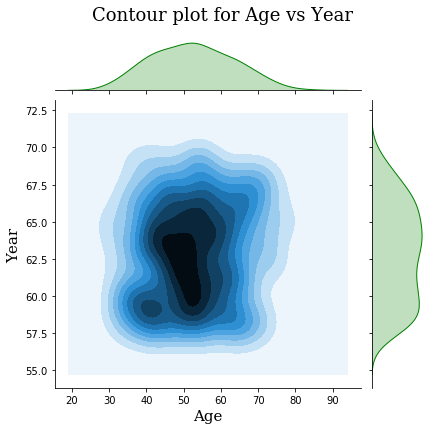

In [20]:
p = sns.jointplot(x="age", y="year", data=haberman_df, kind="kde", marginal_kws={'lw':1, 'color':'green'})


p.set_axis_labels('Age', 'Year', fontsize=15, fontfamily= 'serif')

p.fig.suptitle("Contour plot for Age vs Year", fontsize=18, fontfamily= 'serif')
p.fig.subplots_adjust(top=0.90)

### Observation
Between the year 1958 to 1965, most patients aged between 42 to 52.

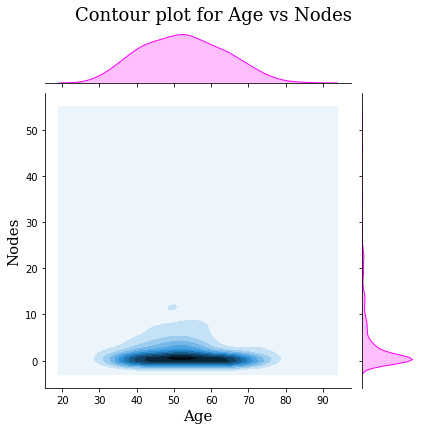

In [21]:
p = sns.jointplot(x="age", y="nodes", data=haberman_df, kind="kde", marginal_kws={'lw':1,'color':'magenta'});

p.set_axis_labels('Age', 'Nodes', fontsize=15, fontfamily= 'serif')
p.fig.suptitle("Contour plot for Age vs Nodes", fontsize=18, fontfamily= 'serif')
p.fig.subplots_adjust(top=0.92)

### Observation
Most of the patient of all age have very less positive auxilary nodes, patients having more auxilary nodes are rare.